In [1]:
1 + hash('Artur_Sabiryanov') % 21

19

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from utils import parse_sparce, MyGradientBoostingRegressorWithLinFeat

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

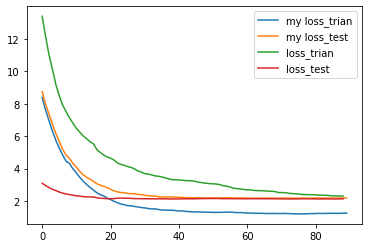

In [10]:
# plt.plot(mymodel.loss_train[10:], label = 'my loss_trian')
# plt.plot(mymodel.loss_test[10:], label = 'my loss_test')
# plt.plot(model.train_score_[10:],label = 'loss_trian')
# plt.plot(errors[10:], label = 'loss_test')
# # plt.plot(model.train_score_[10:] * 1.03, linestyle='--')
# # plt.plot(errors[10:] * 1.03, linestyle='--')
# # plt.plot(model.train_score_[10:] * 0.97, linestyle='--')
# # plt.plot(errors[10:] * 0.97, linestyle='--')
# plt.legend()

# график лосса
# убрал 3 процентные отступы, тк мешали 

In [3]:
X, y = [], []
X_cat = []
with open('auto-mpg.data') as f:
    for line in f:
        line = line.replace('?', '0')
        items = np.array(list(map(float, line.split()[:8])))
        y.append(items[0])
        X.append(items[2:7])
        X_cat.append(items[[1, 7]])
y = np.array(y)
X = np.array(X)
X_cat = np.array(X_cat)

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat2 = enc.fit_transform(X_cat)
X = np.concatenate((X, X_cat2), axis=1)
X.shape, y.shape

((398, 13), (398,))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_test.shape

((318, 13), (80, 13))

In [5]:
%%time
mymodel = MyGradientBoostingRegressorWithLinFeat(n_estimators = 100, loss = 'mae', new_feat=10)
mymodel.fit(X_train, y_train, X_test, y_test)

Wall time: 2.63 s


In [6]:
model = GradientBoostingRegressor(criterion='mae')
model.n_estimators = 1
model.warm_start = True
errors = []
for est_num in range(1, 100):
    model.n_estimators = est_num
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    error = mean_absolute_error(y_test, pred)
    errors.append(error)
    
errors = np.array(errors)


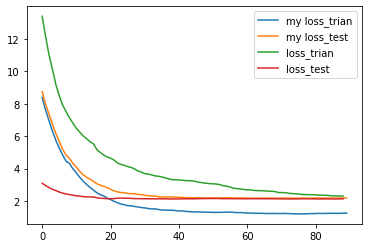

In [9]:
plt.plot(mymodel.loss_train[10:], label = 'my loss_trian')
plt.plot(mymodel.loss_test[10:], label = 'my loss_test')
plt.plot(model.train_score_[10:],label = 'loss_trian')
plt.plot(errors[10:], label = 'loss_test')
# plt.plot(model.train_score_[10:] * 1.03, linestyle='--')
# plt.plot(errors[10:] * 1.03, linestyle='--')
# plt.plot(model.train_score_[10:] * 0.97, linestyle='--')
# plt.plot(errors[10:] * 0.97, linestyle='--')
plt.legend()